<a href="https://colab.research.google.com/github/samratvij/wearyourglasses/blob/master/Detect_glasses_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Plan:
1. Collect dataset: <br>
a. Glasses or Not from Kaggle (https://www.kaggle.com/jorgebuenoperez/datacleaningglassesnoglasses) - DONE <br>
b. SOF (Specs on Faces https://sites.google.com/view/sof-dataset) - DONE <br>
c. Own pictures: Develop python bot to take pictures from webcam every 5-10 mins - DONE (Capture images for 5-10 days - DONE)  <br>
2. Scale images to same dimensions - DONE
3. Data Augmentation (Not on SOF: already augmented)
4. Split in train test validation
5. Apply Transfer Learning
6. Evaluate and Iterate

` Installing required package(s)`

In [ ]:
!pip install unrar 

`Importing packages`

In [35]:
import cv2
import matplotlib.pyplot as plt
import scipy.io
import os
import glob
%matplotlib inline

`Mounting Google drive`

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


`Loading SOF dataset`

In [ ]:
!unrar x 'original images.rar'


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from original images.rar

Creating    original images                                           OK
Extracting  original images/AbdA_00001_m_31_i_fr_nc_no_2016_2_e0_nl_o.jpg       0%  OK 
Extracting  original images/AbdA_00002_m_31_i_fr_nc_sr_2016_2_e0_nl_o.jpg       0%  OK 
Extracting  original images/AbdA_00003_m_31_i_fr_nc_hp_2016_2_e0_nl_o.jpg       0%  OK 
Extracting  original images/AbdA_00004_m_31_i_fr_nc_hp_2016_2_e0_nl_o.jpg       0%  OK 
Extracting  original images/AbdA_00005_m_31_i_fr_nc_hp_2016_2_e0_nl_o.jpg       0%  OK 
Extracting  original images/AbdA_00006_m_31_i_fr_nc_hp_2016_2_e0_nl_o.jpg       0%  OK 
Extracting  original images/AbdA_00007_m_31_i_fr_nc_hp_2016_2_e0_nl_o.jpg       0%  OK 
Extracting  original images/AbdA_00008_m_31_i_fr_nc_hp_2016_2_e0_nl_o.jpg       0%  OK 
Extracting  original images/AbdA_00009_m_31_i

In [ ]:
!rm 'original images.rar'

In [59]:
!unrar x 'metadata.rar'


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from metadata.rar

Creating    metadata                                                  OK
Extracting  metadata/metadata.mat                                          5% 10% 15% 20% 25% 31% 36% 41% 46% 51% 57% 62% 67% 72% 77% 82% 88% 93% 98% 99%  OK 
All OK


In [60]:
!rm 'metadata.rar'

`Getting glasses dataset from Kaggle`

In [3]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

In [4]:
%cd /content/drive/MyDrive/Kaggle/

/content/drive/MyDrive/Kaggle


In [51]:
!kaggle datasets download -d jorgebuenoperez/datacleaningglassesnoglasses 

 97% 449M/465M [00:05<00:00, 63.2MB/s]
100% 465M/465M [00:05<00:00, 88.0MB/s]


In [26]:
!rm -r Images

In [27]:
%ls

 datacleaningglassesnoglasses.zip   no_clear.txt       'Webcam Capture'/
 glasses.txt                        no_glasses.txt
 kaggle.json                       'original images'/


In [28]:
!unzip datacleaningglassesnoglasses.zip

Archive:  datacleaningglassesnoglasses.zip
  inflating: Images/Images/glasses/face-10.jpg  
  inflating: Images/Images/glasses/face-100.jpg  
  inflating: Images/Images/glasses/face-1001.jpg  
  inflating: Images/Images/glasses/face-1002.jpg  
  inflating: Images/Images/glasses/face-1003.jpg  
  inflating: Images/Images/glasses/face-1005.jpg  
  inflating: Images/Images/glasses/face-1006.jpg  
  inflating: Images/Images/glasses/face-1008.jpg  
  inflating: Images/Images/glasses/face-101.jpg  
  inflating: Images/Images/glasses/face-1011.jpg  
  inflating: Images/Images/glasses/face-1012.jpg  
  inflating: Images/Images/glasses/face-1013.jpg  
  inflating: Images/Images/glasses/face-1014.jpg  
  inflating: Images/Images/glasses/face-1017.jpg  
  inflating: Images/Images/glasses/face-1023.jpg  
  inflating: Images/Images/glasses/face-1029.jpg  
  inflating: Images/Images/glasses/face-103.jpg  
  inflating: Images/Images/glasses/face-1030.jpg  
  inflating: Images/Images/glasses/face-1031

In [30]:
%ls -al

total 476520
-rw------- 1 root root 487528874 Feb 19 14:26  datacleaningglassesnoglasses.zip
-rw------- 1 root root    229326 Jan 31  2021  glasses.txt
drwx------ 3 root root      4096 Feb 19 15:00  Images/
-rw------- 1 root root        65 Jan 25 17:11  kaggle.json
-rw------- 1 root root      6383 Jan 31  2021  no_clear.txt
-rw------- 1 root root    178190 Jan 31  2021  no_glasses.txt
drwx------ 2 root root      4096 Feb  3 18:23 'original images'/
drwx------ 4 root root      4096 Feb 16 18:21 'Webcam Capture'/


In [37]:
!rm datacleaningglassesnoglasses.zip

In [38]:
%ls -al

total 418
-rw------- 1 root root 229326 Jan 31  2021  glasses.txt
drwx------ 3 root root   4096 Feb 19 15:00  Images/
-rw------- 1 root root     65 Jan 25 17:11  kaggle.json
-rw------- 1 root root   6383 Jan 31  2021  no_clear.txt
-rw------- 1 root root 178190 Jan 31  2021  no_glasses.txt
drwx------ 2 root root   4096 Feb  3 18:23 'original images'/
drwx------ 4 root root   4096 Feb 16 18:21 'Webcam Capture'/


`Checking images from 3 sources`

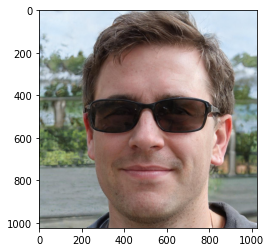

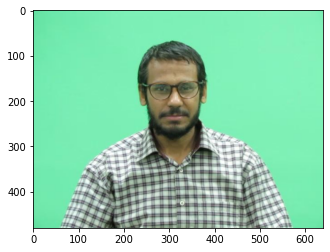

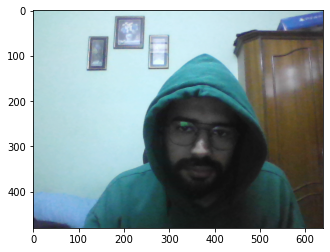

In [46]:
img1 = cv2.imread('Images/Images/glasses/face-2.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('original images/AbdA_00001_m_31_i_fr_nc_no_2016_2_e0_nl_o.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.imread('Webcam Capture/Glasses/opencv_frame_0_Thu Jan 27 11:44:00 2022.png')
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.show()
plt.imshow(img2)
plt.show()
plt.imshow(img3)
plt.show()

In [49]:
print("Dimensions of Image(s) from Kaggle dataset:", img1.shape[0], "X", img1.shape[1])
print("Dimensions of Image(s) from SOF dataset:", img2.shape[0], "X", img2.shape[1])
print("Dimensions of Image(s) from Webcam dataset:", img3.shape[0], "X", img3.shape[1])

Dimensions of Image(s) from Kaggle dataset: 1024 X 1024
Dimensions of Image(s) from SOF dataset: 480 X 640
Dimensions of Image(s) from Webcam dataset: 480 X 640


` Images from Kaggle need to be resized to 480 X 640`

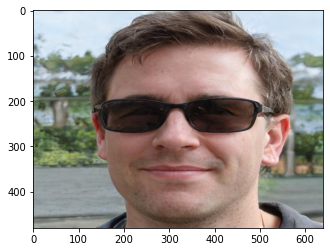

In [50]:
width, height = 640, 480
plt.imshow(cv2.resize(img1, (width, height), interpolation = cv2.INTER_AREA,))

` Resizing directly looks fine, will perform the same for all files in Kaggle dataset and overwrite original images`

In [58]:
rootdir = '/content/drive/MyDrive/Kaggle/Images/Images'

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        img = cv2.imread(os.path.join(subdir, file))
        resized = cv2.resize(img, (width, height), interpolation = cv2.INTER_AREA,)
        cv2.imwrite(os.path.join(subdir, file), resized)
        print(os.path.join(subdir, file))

/content/drive/MyDrive/Kaggle/Images/Images/glasses/face-10.jpg
/content/drive/MyDrive/Kaggle/Images/Images/glasses/face-100.jpg
/content/drive/MyDrive/Kaggle/Images/Images/glasses/face-1001.jpg
/content/drive/MyDrive/Kaggle/Images/Images/glasses/face-1002.jpg
/content/drive/MyDrive/Kaggle/Images/Images/glasses/face-1003.jpg
/content/drive/MyDrive/Kaggle/Images/Images/glasses/face-1005.jpg
/content/drive/MyDrive/Kaggle/Images/Images/glasses/face-1006.jpg
/content/drive/MyDrive/Kaggle/Images/Images/glasses/face-1008.jpg
/content/drive/MyDrive/Kaggle/Images/Images/glasses/face-101.jpg
/content/drive/MyDrive/Kaggle/Images/Images/glasses/face-1011.jpg
/content/drive/MyDrive/Kaggle/Images/Images/glasses/face-1012.jpg
/content/drive/MyDrive/Kaggle/Images/Images/glasses/face-1013.jpg
/content/drive/MyDrive/Kaggle/Images/Images/glasses/face-1014.jpg
/content/drive/MyDrive/Kaggle/Images/Images/glasses/face-1017.jpg
/content/drive/MyDrive/Kaggle/Images/Images/glasses/face-1023.jpg
/content/drive

` Exploring SOF metadata`

In [5]:
mat = scipy.io.loadmat('metadata/metadata.mat') 

In [64]:
sorted(mat.keys())

['__globals__', '__header__', '__version__', 'metadata']

In [24]:
# Metadata has 4 keys - 'metadata' has the data we need.
# In metadata, there's only 1 element [0] containing 2662 elements, one for each image. 
## Under each element, 10th element means whether there's a eyewear in the picture.

#Checking the meaning of different values in the eyewear element
arr1 = []
arr2 = []
arr3 = []
arr4 = []
arr0 = []
for i in range(len(mat['metadata'][0])):
  ind = mat['metadata'][0][i][1][0][0][0] 
  x = mat['metadata'][0][i][10][0][0] 
  if x == 1:
    arr1.append(ind)
  if x == 2:
    arr2.append(ind)
  if x == 3:
    arr3.append(ind)
  if x == 4:
    arr4.append(ind)
  if x == 0:
    arr0.append(ind)

In [25]:
print("0 - ", arr0[:5])
print("1 - ", arr1[:5])
print("2 - ", arr2[:5])
print("3 - ", arr3[:5])
print("4 - ", arr4[:5])

0 -  []
1 -  ['00001', '00002', '00003', '00004', '00005']
2 -  ['00130', '00131', '00329', '00330', '00827']
3 -  ['00308', '00521', '00554', '00555', '00560']
4 -  ['01960']


Example of 1: 



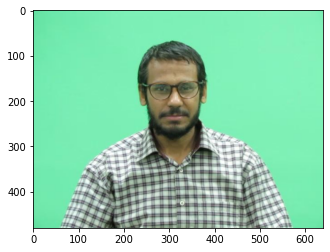

Example of 2: 



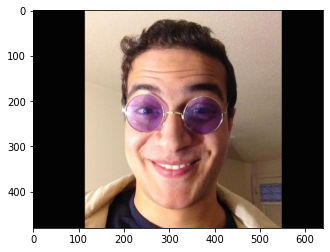

Example of 3: 



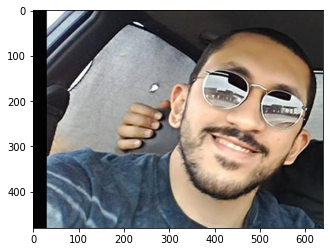

Example of 4: 



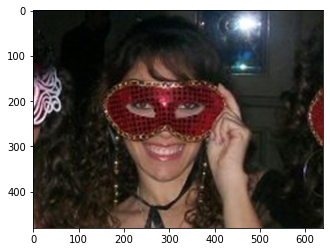

In [39]:
rootdir = '/content/drive/MyDrive/Kaggle/original images'

for file in glob.glob('/content/drive/MyDrive/Kaggle/original images/*'+arr1[0]+'*'):
  img1 = cv2.imread(os.path.join(rootdir, file))
  img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
  print("Example of 1: \n")
  plt.imshow(img1)
  plt.show()

for file in glob.glob('/content/drive/MyDrive/Kaggle/original images/*'+arr2[0]+'*'):
  img1 = cv2.imread(os.path.join(rootdir, file))
  img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
  print("Example of 2: \n")
  plt.imshow(img1)
  plt.show()

for file in glob.glob('/content/drive/MyDrive/Kaggle/original images/*'+arr3[0]+'*'):
  img1 = cv2.imread(os.path.join(rootdir, file))
  img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
  print("Example of 3: \n")
  plt.imshow(img1)
  plt.show()

for file in glob.glob('/content/drive/MyDrive/Kaggle/original images/*'+arr4[0]+'*'):
  img1 = cv2.imread(os.path.join(rootdir, file))
  img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
  print("Example of 4: \n")
  plt.imshow(img1)
  plt.show()

> 1 means  eyeglasses; 2 means semi-transparent sunglasses; 3 means opaque sunglasses; 4 means non-glasses occlusions, such as masks. <br>

> All pictures in SOF dataset have specs (as the name suggests; lol). Since there is no negative class, it may lead to ineffective learning for the NN, create bias and result in bad results. However, I'll try with and without using this dataset to test this hypothesis.